以下のパラメータでシミュレーションを実行して、hopG >= 2 の場合は、協力が進化しないことを確認する。hopG = 1 の場合については、hopG_1.ipynb で確認する。
```julia
# ../data/___.csv
# simulation_pattern: 5625
trial_count = 10  # 100
agent_count = 10^3
generations = 10^3

network_type_list = [:scale_free_4, :scale_free_6, :scale_free_8, :regular_4, :random_4]
weak_selection_list = [true]  # [true, false]
calc_payoffs_pattern_list = [1, 2, 3]
hop_game_list = [1, 2, 3, 4, 5]
hop_learning_list = [1, 2, 3, 4, 5]
b_list = [4.0, 5.0, 6.0]
μ_list = [0.01]
δ_list = [0.075, 0.125, 0.25, 0.5, 1.0]
```

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.0, style = 'darkgrid')

In [2]:
COLUMNS = ['network_type', 'weak_selection', 'calc_pattern', 'hop_game', 'hop_learning', 'b', 'μ', 'δ', 'trial', 'step', 'cooperator_rate']
GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['trial', 'step', 'cooperator_rate']]

def load_df(csv_file_name: str) -> pd.DataFrame:
    dtype = {i: 'category' for i in range(len(COLUMNS))}
    dtype[len(COLUMNS) - 2] = 'int'
    dtype[len(COLUMNS) - 1] = 'float64'
    return pd.read_csv(csv_file_name, header=None, names=COLUMNS, dtype=dtype)

In [3]:
df = load_df('../data/20220505_hopG=All.csv')
print(df.shape)
df = df[df.step >= 800].groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()
df

(5681250, 11)


,network_type,weak_selection,calc_pattern,hop_game,hop_learning,b,μ,δ,cooperator_rate
0,random_4,true,1,1,1,4.0,0.01,0.075,0.059638
1,random_4,true,1,1,1,4.0,0.01,0.125,0.031438
2,random_4,true,1,1,1,4.0,0.01,0.25,0.014162
3,random_4,true,1,1,1,4.0,0.01,0.5,0.002295
4,random_4,true,1,1,1,4.0,0.01,1.0,0.000867
...,...,...,...,...,...,...,...,...,...
5620,scale_free_8,true,3,5,5,6.0,0.01,0.075,0.061300
5621,scale_free_8,true,3,5,5,6.0,0.01,0.125,0.035614
5622,scale_free_8,true,3,5,5,6.0,0.01,0.25,0.015214
5623,scale_free_8,true,3,5,5,6.0,0.01,0.5,0.000000


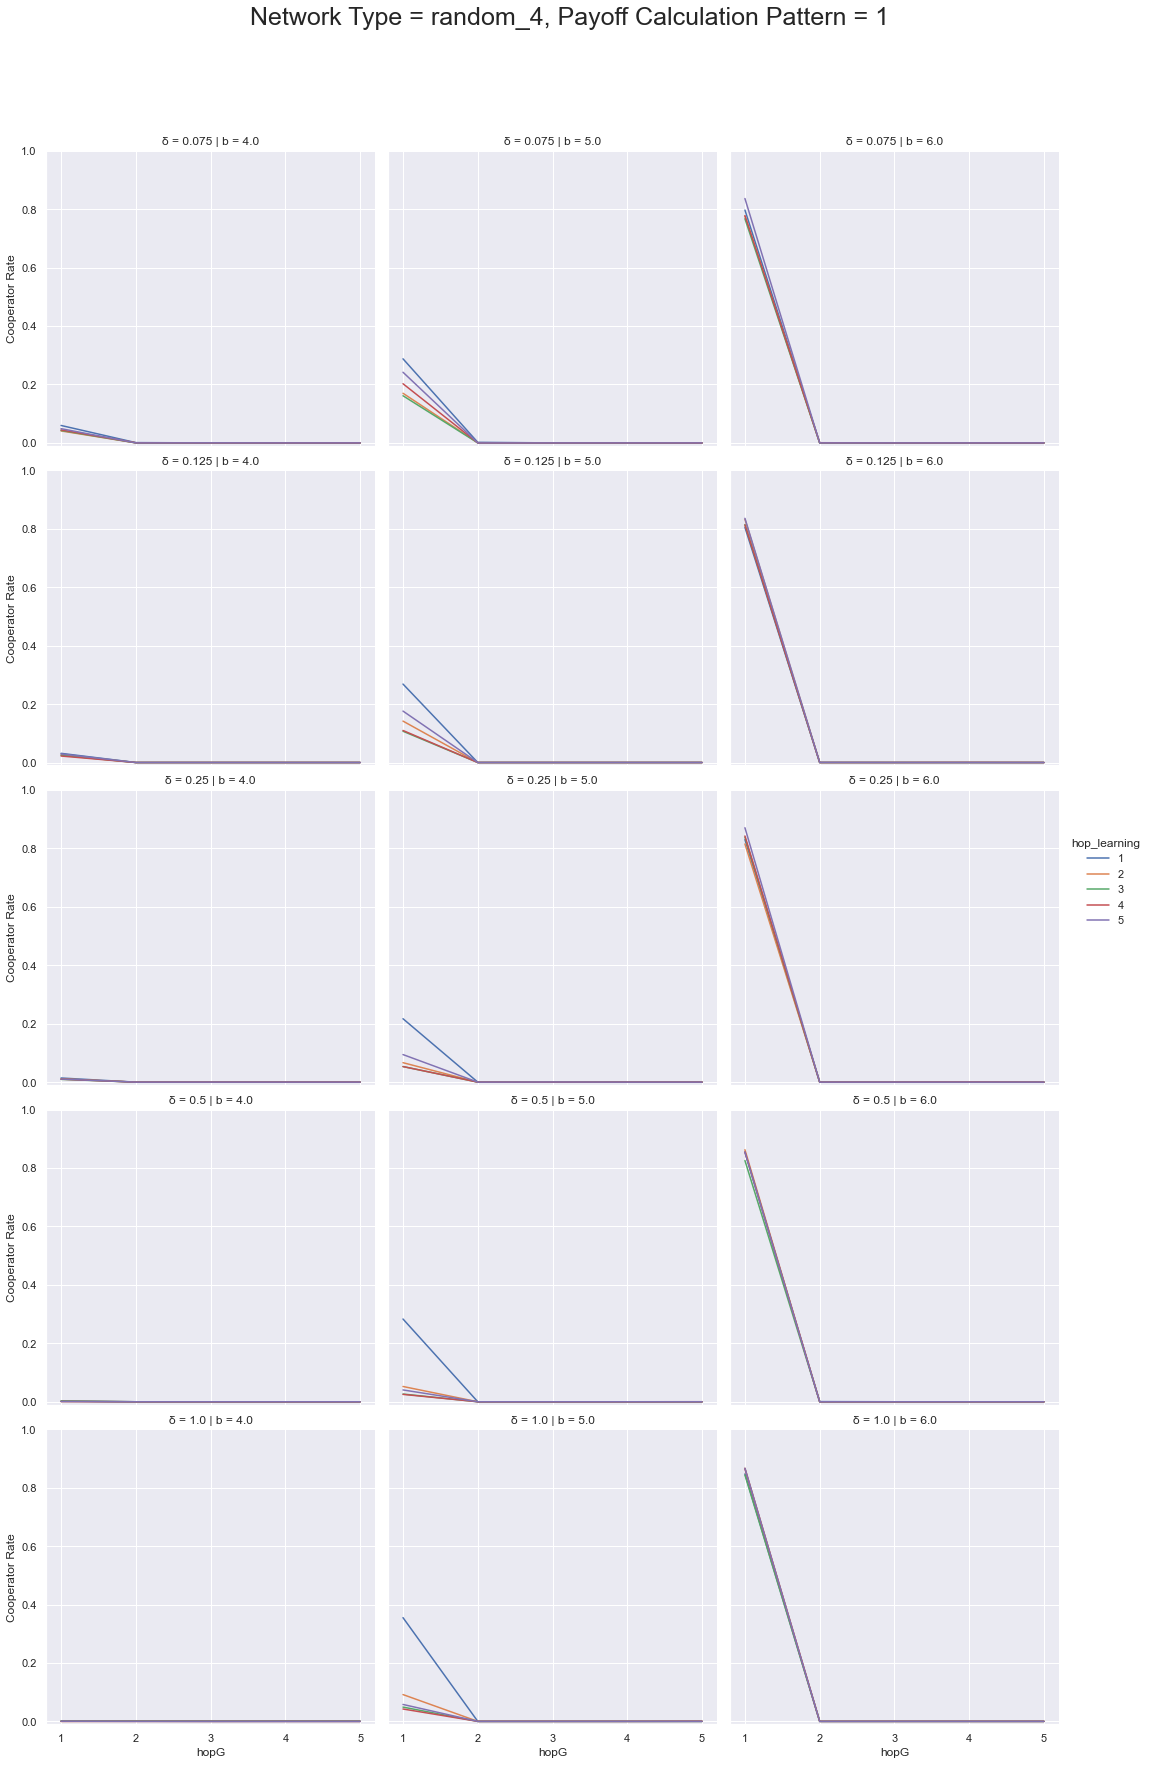

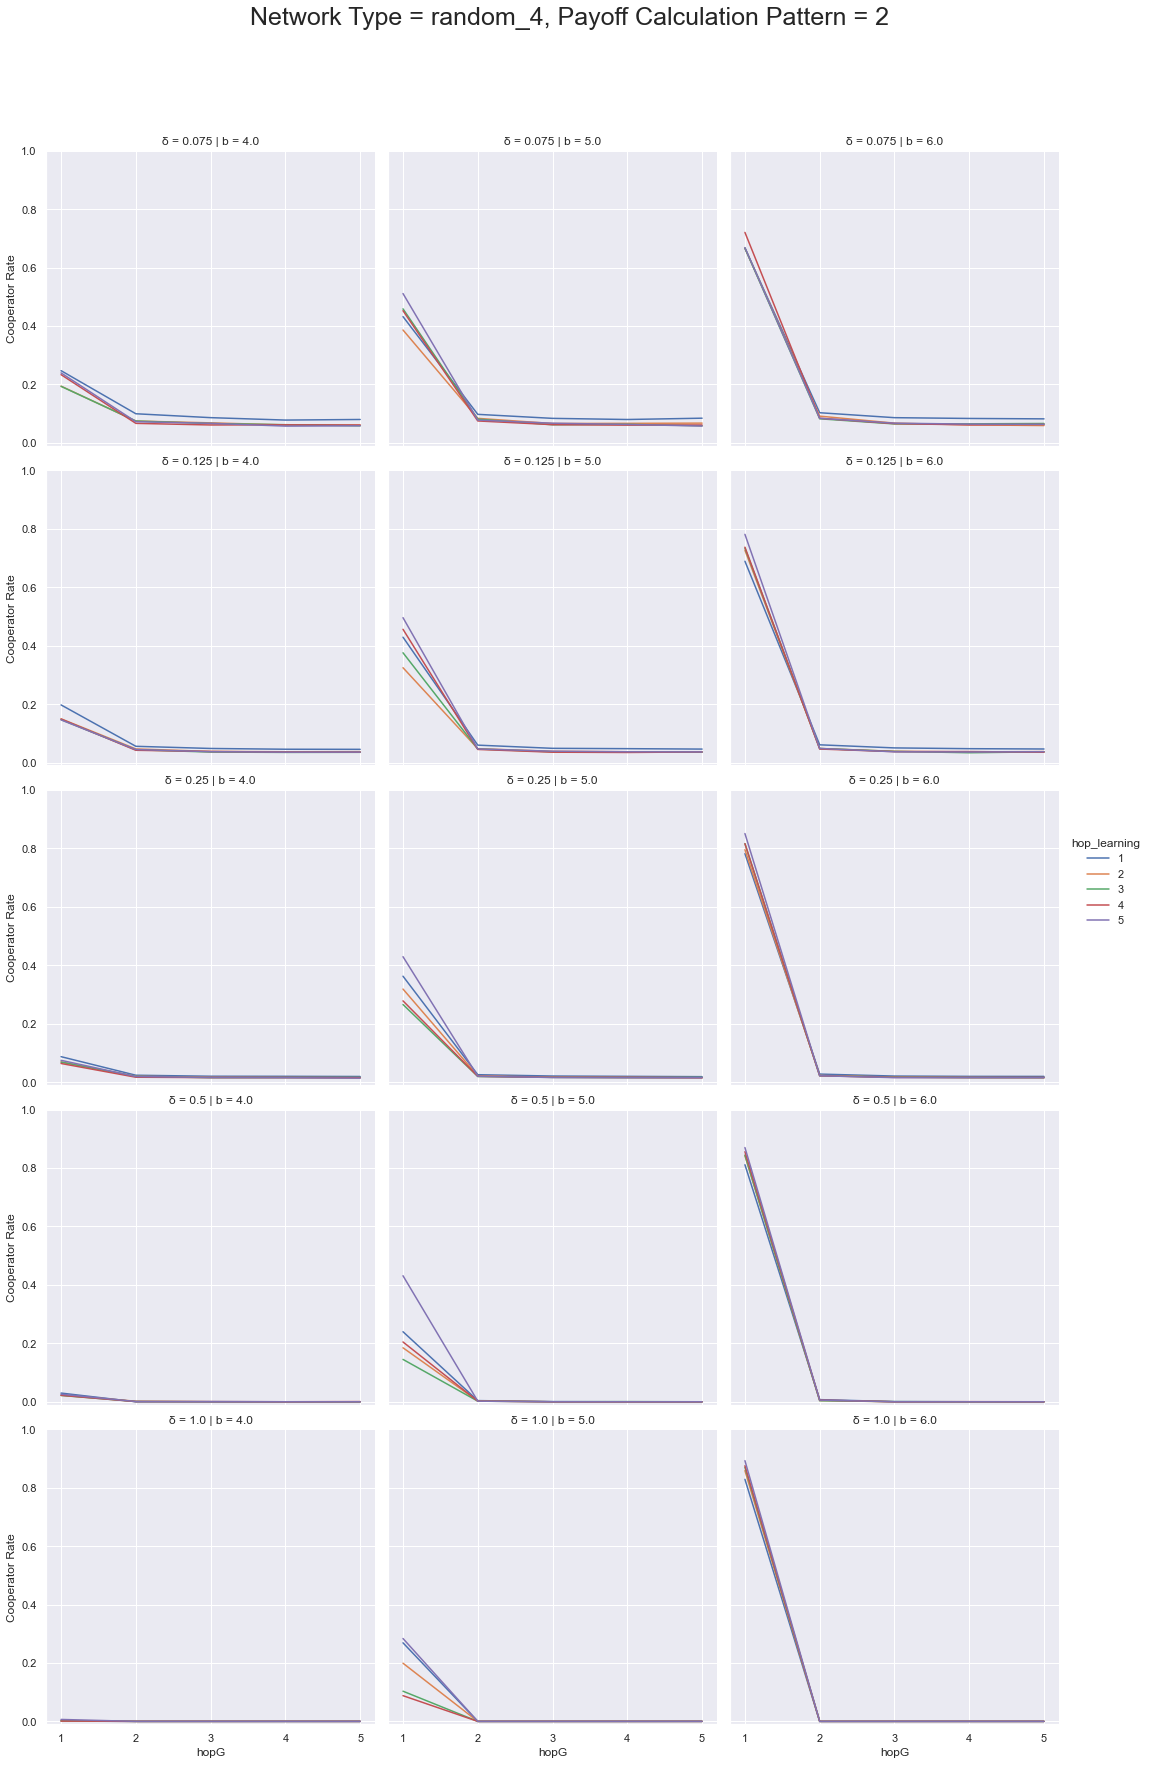

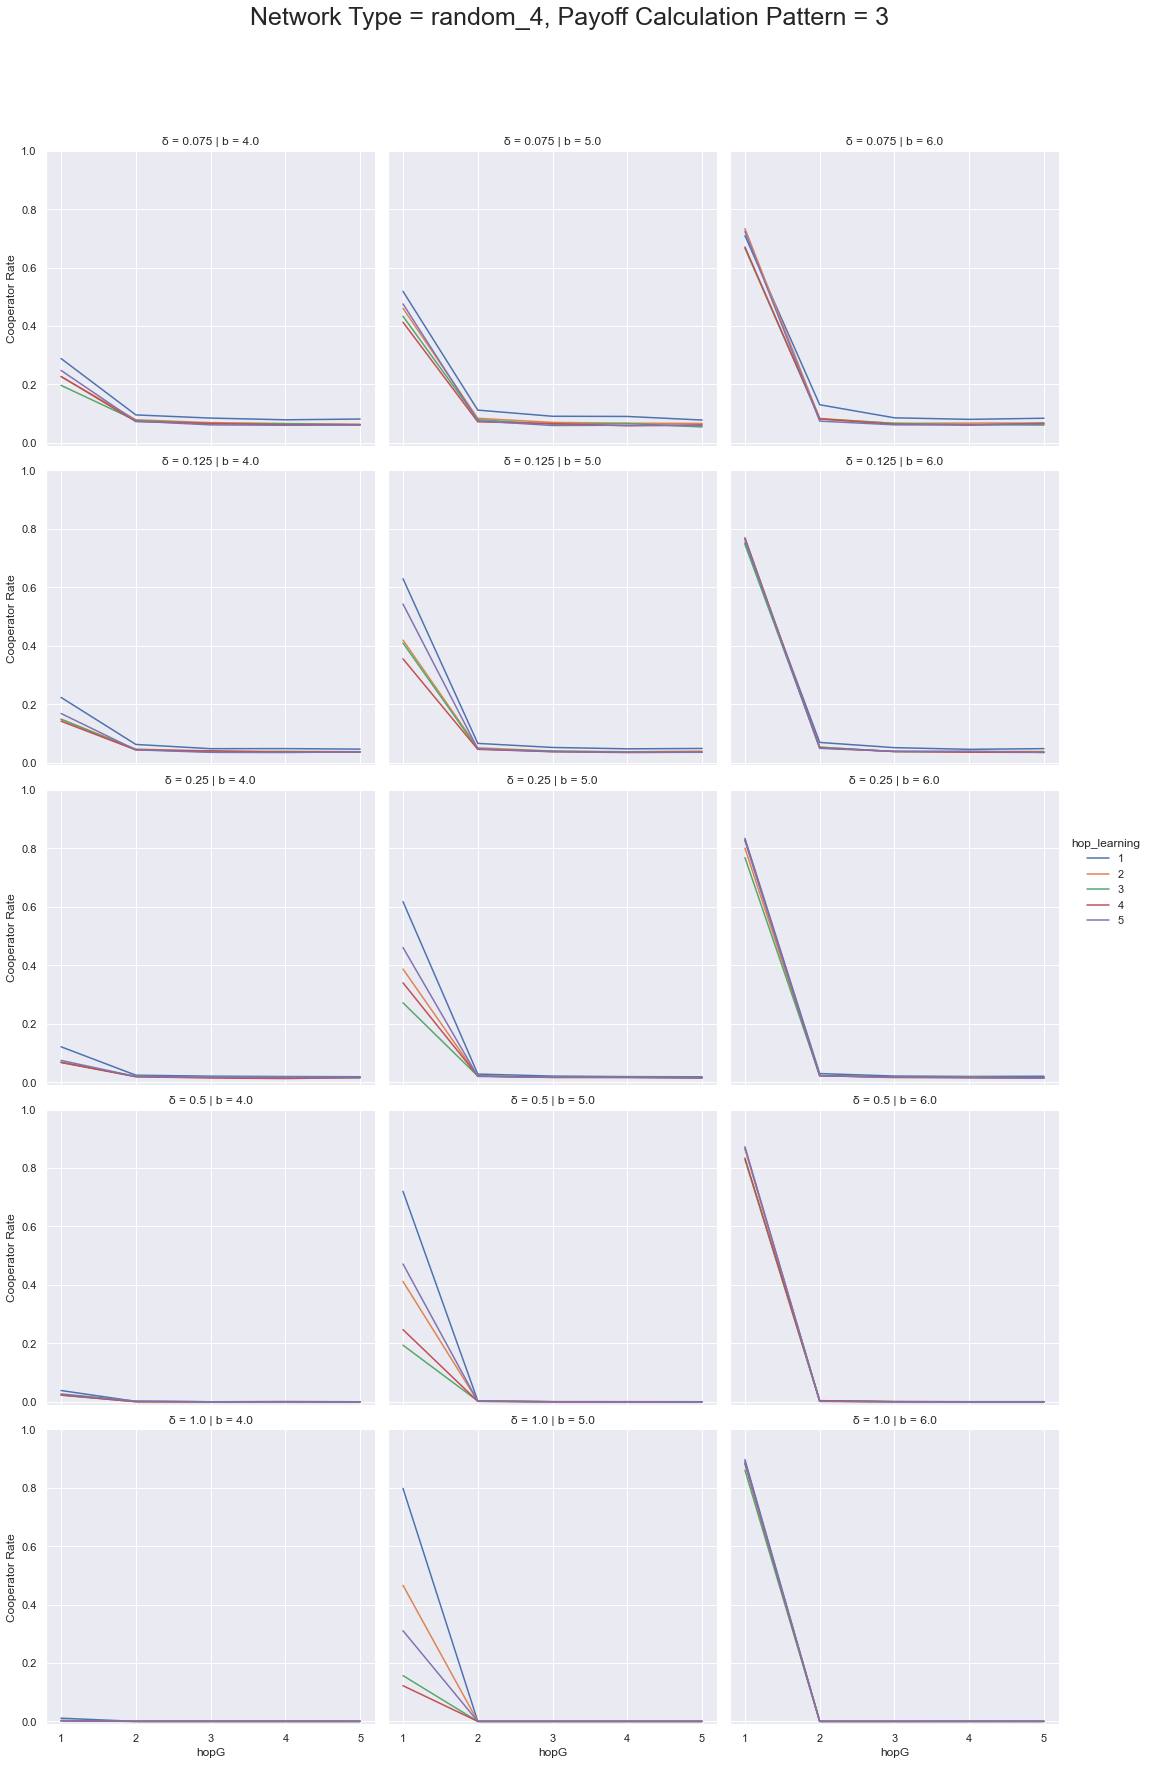

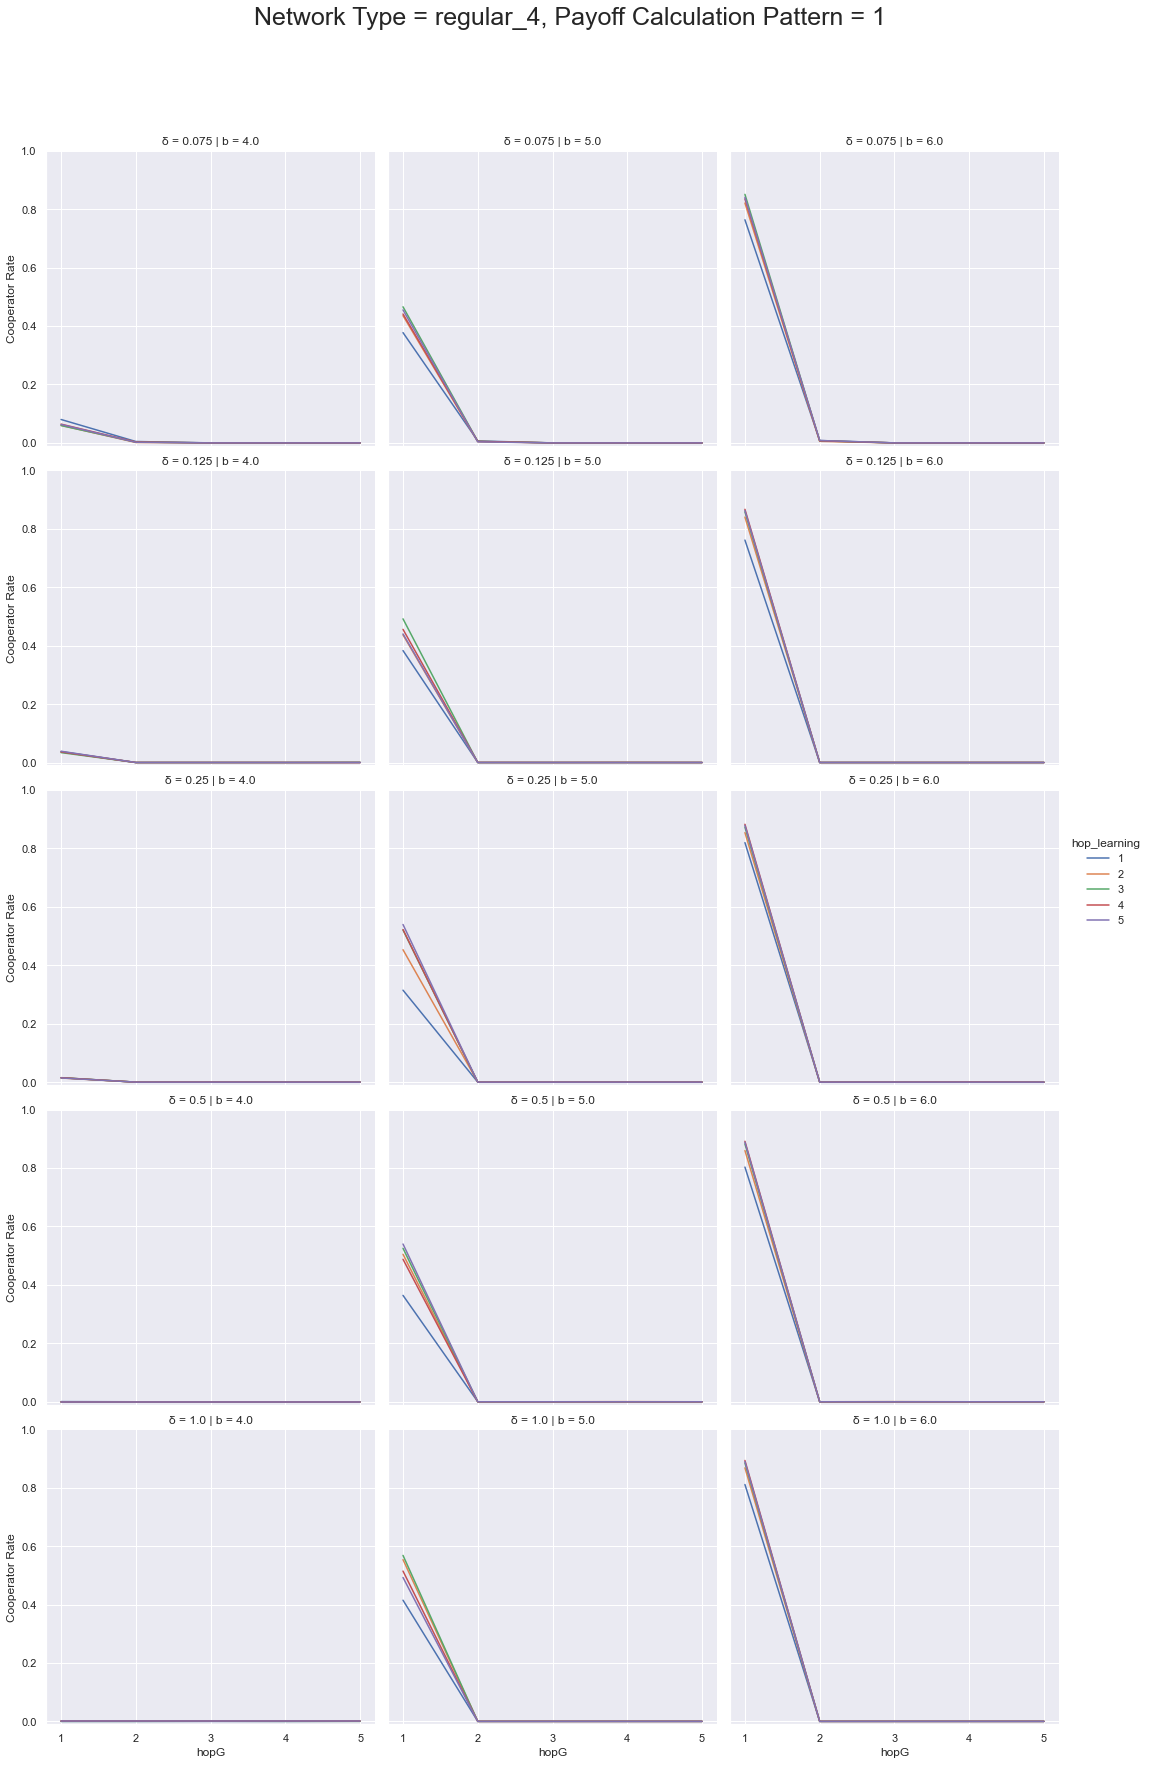

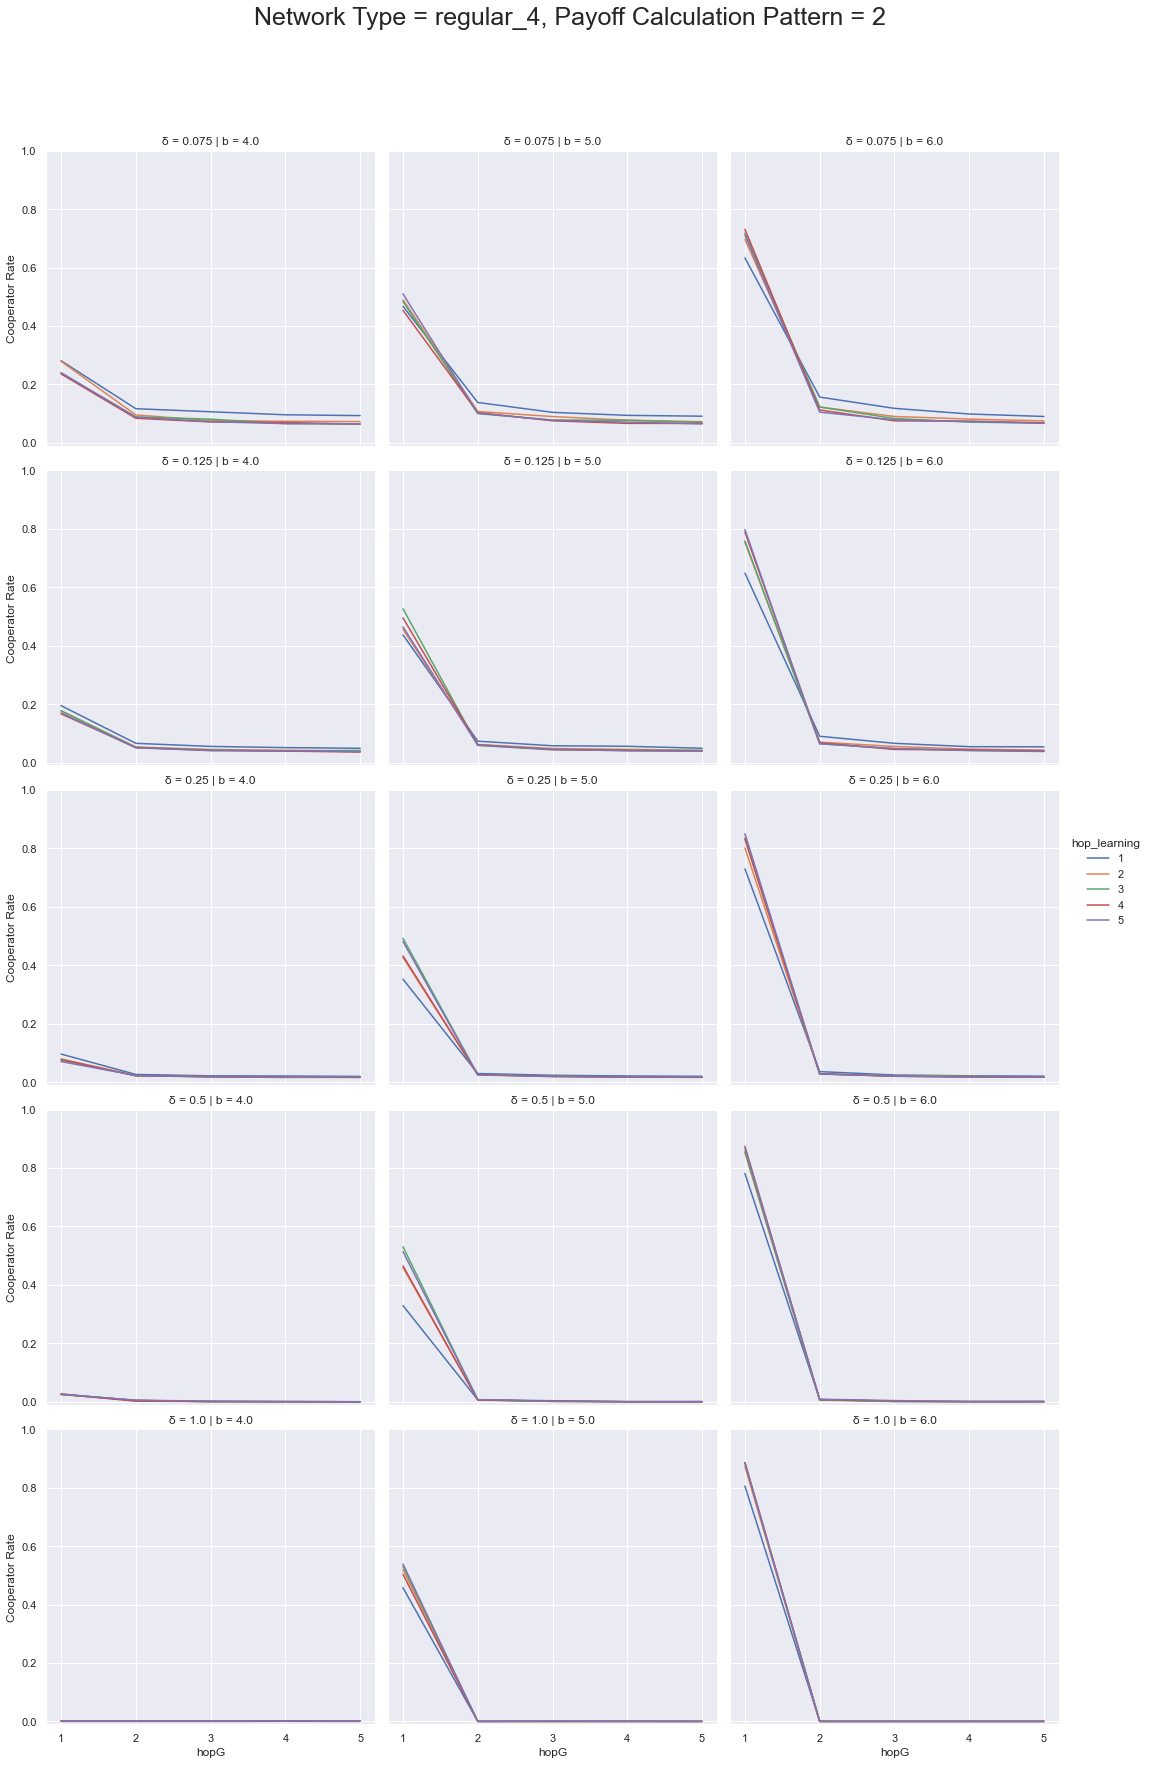

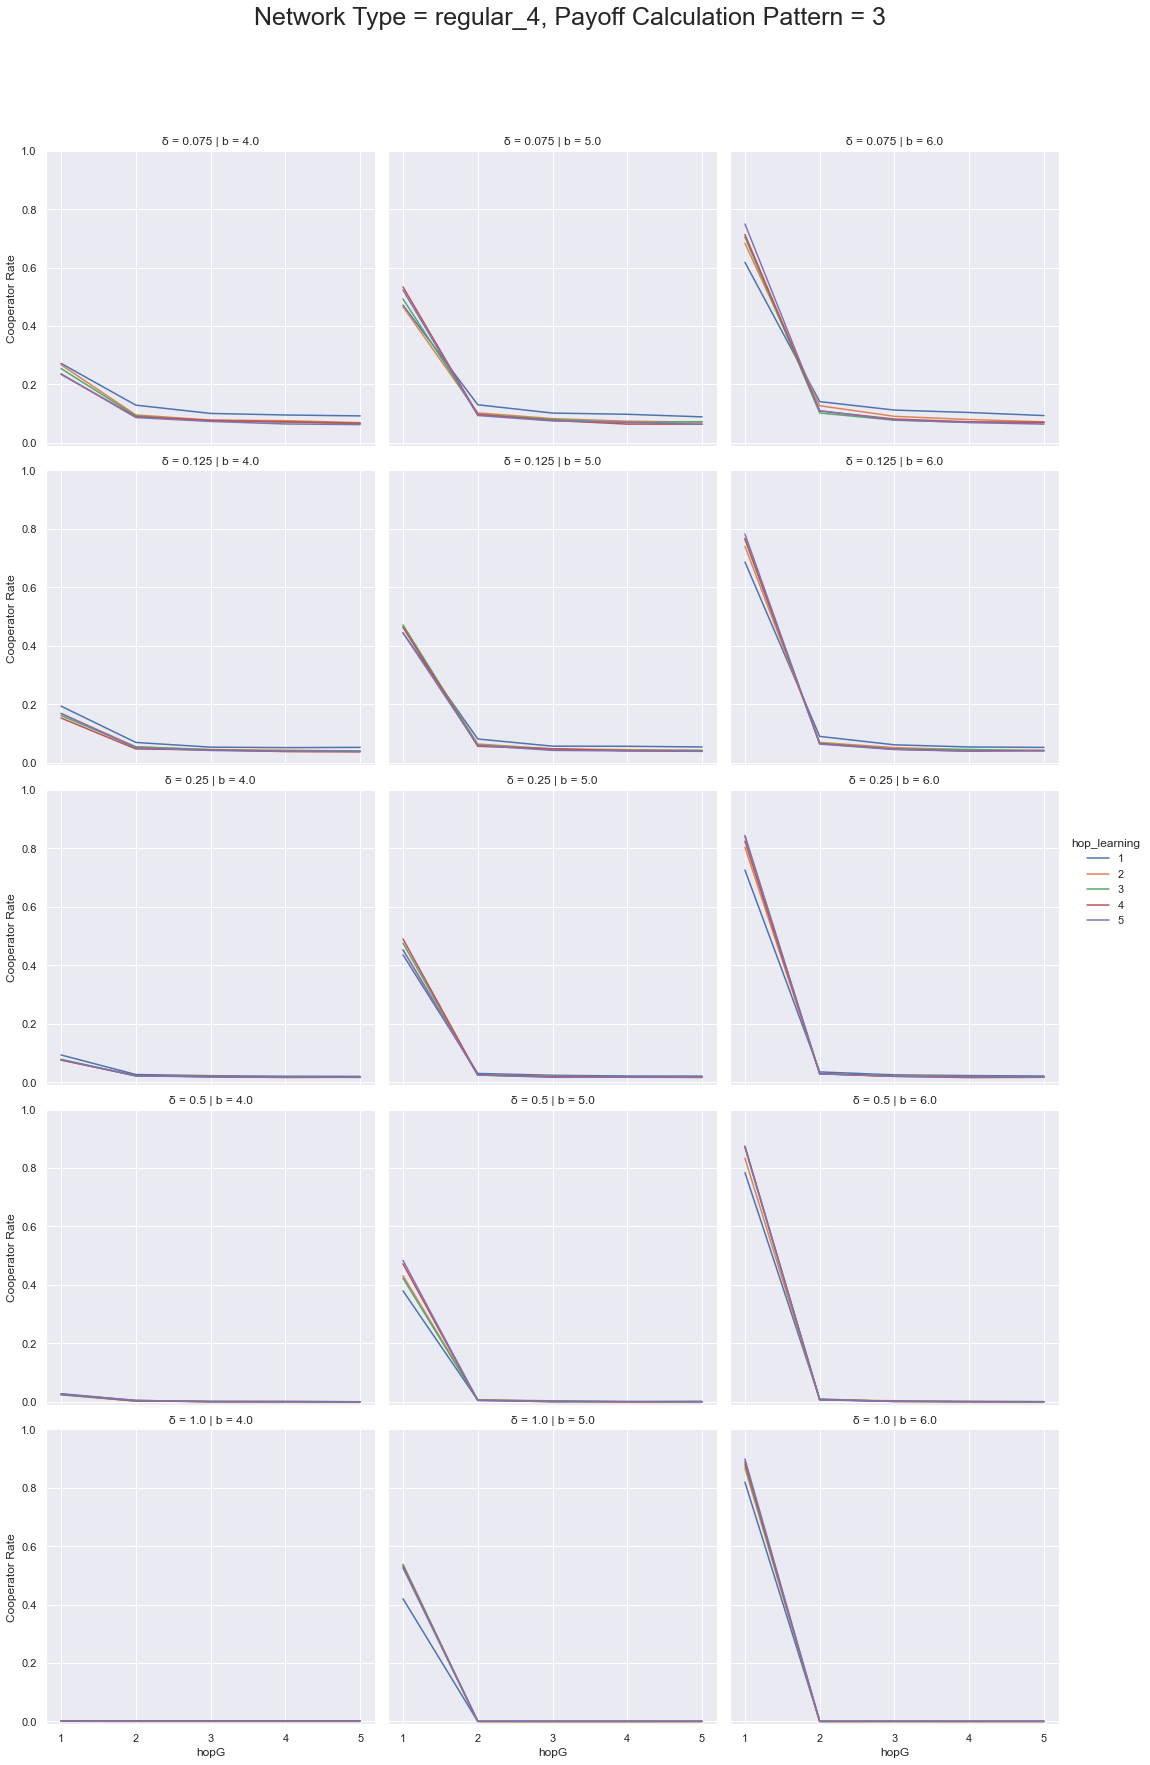

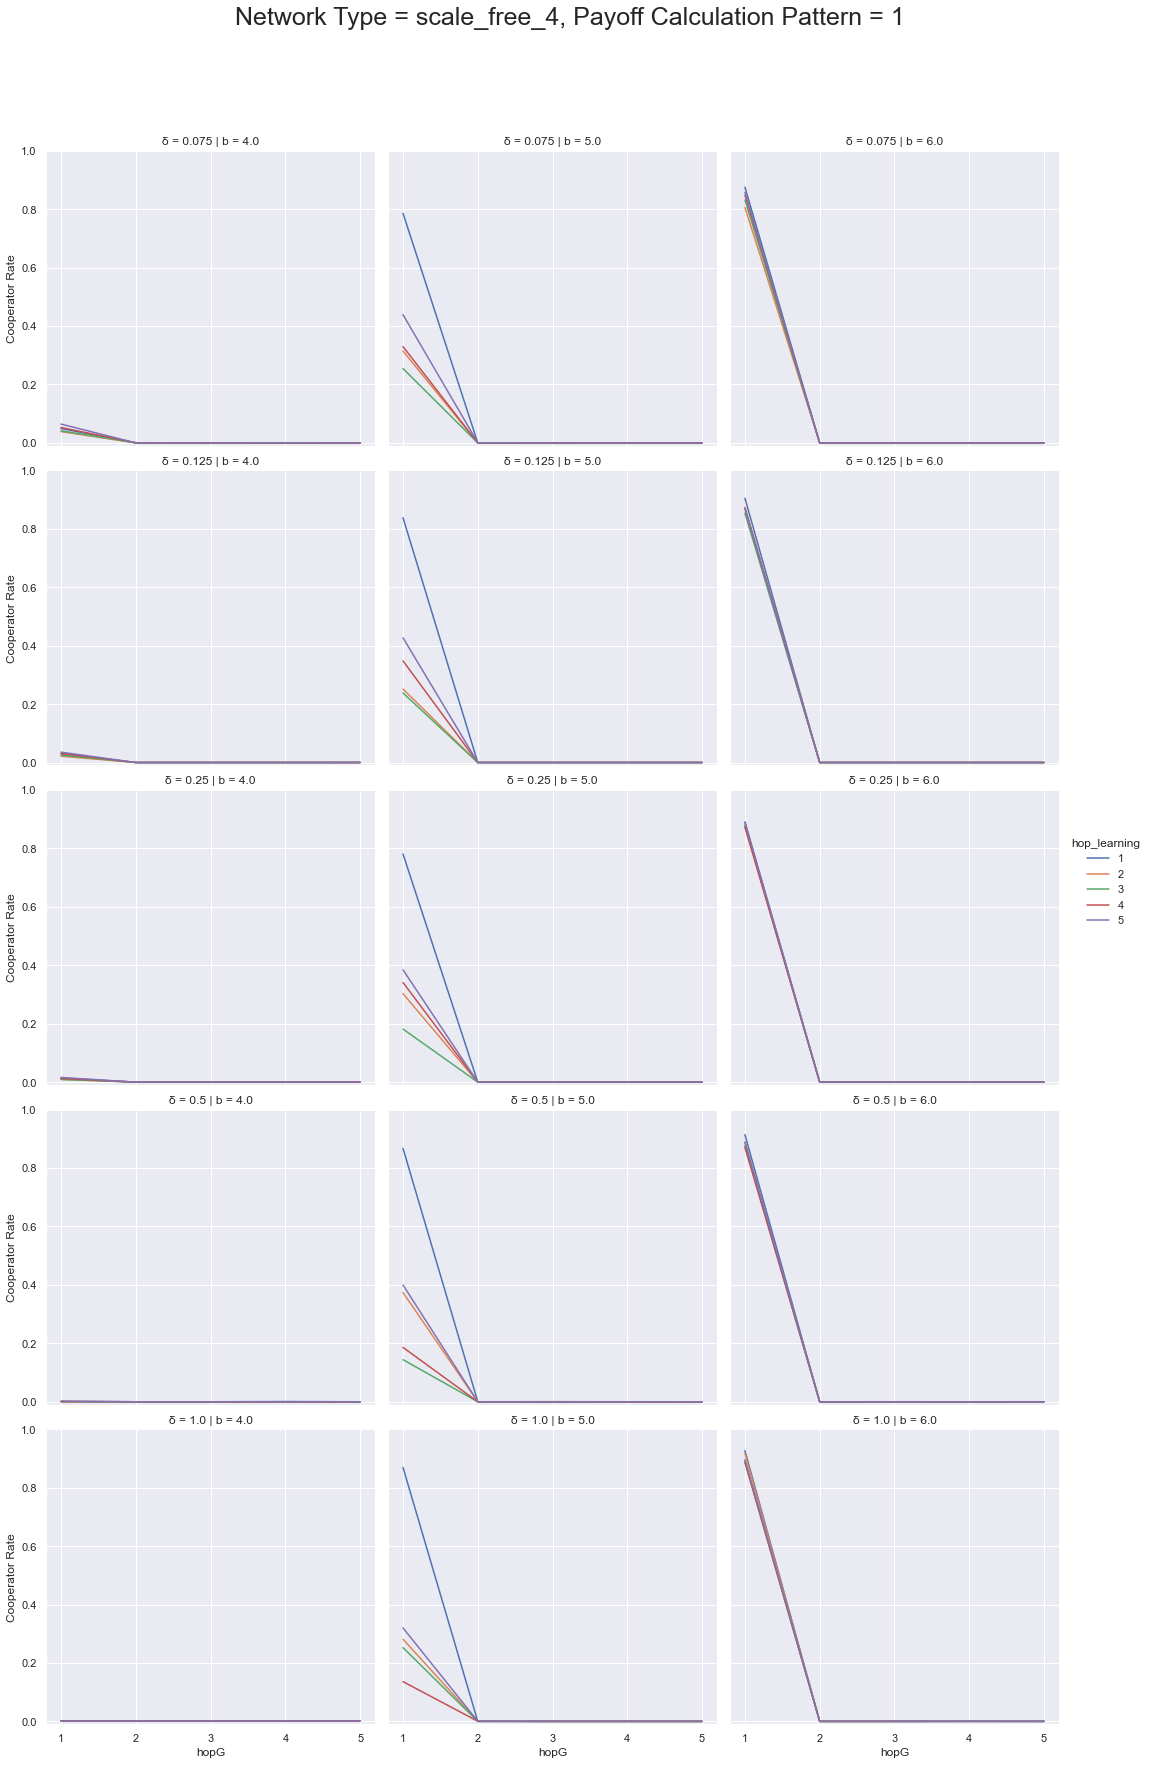

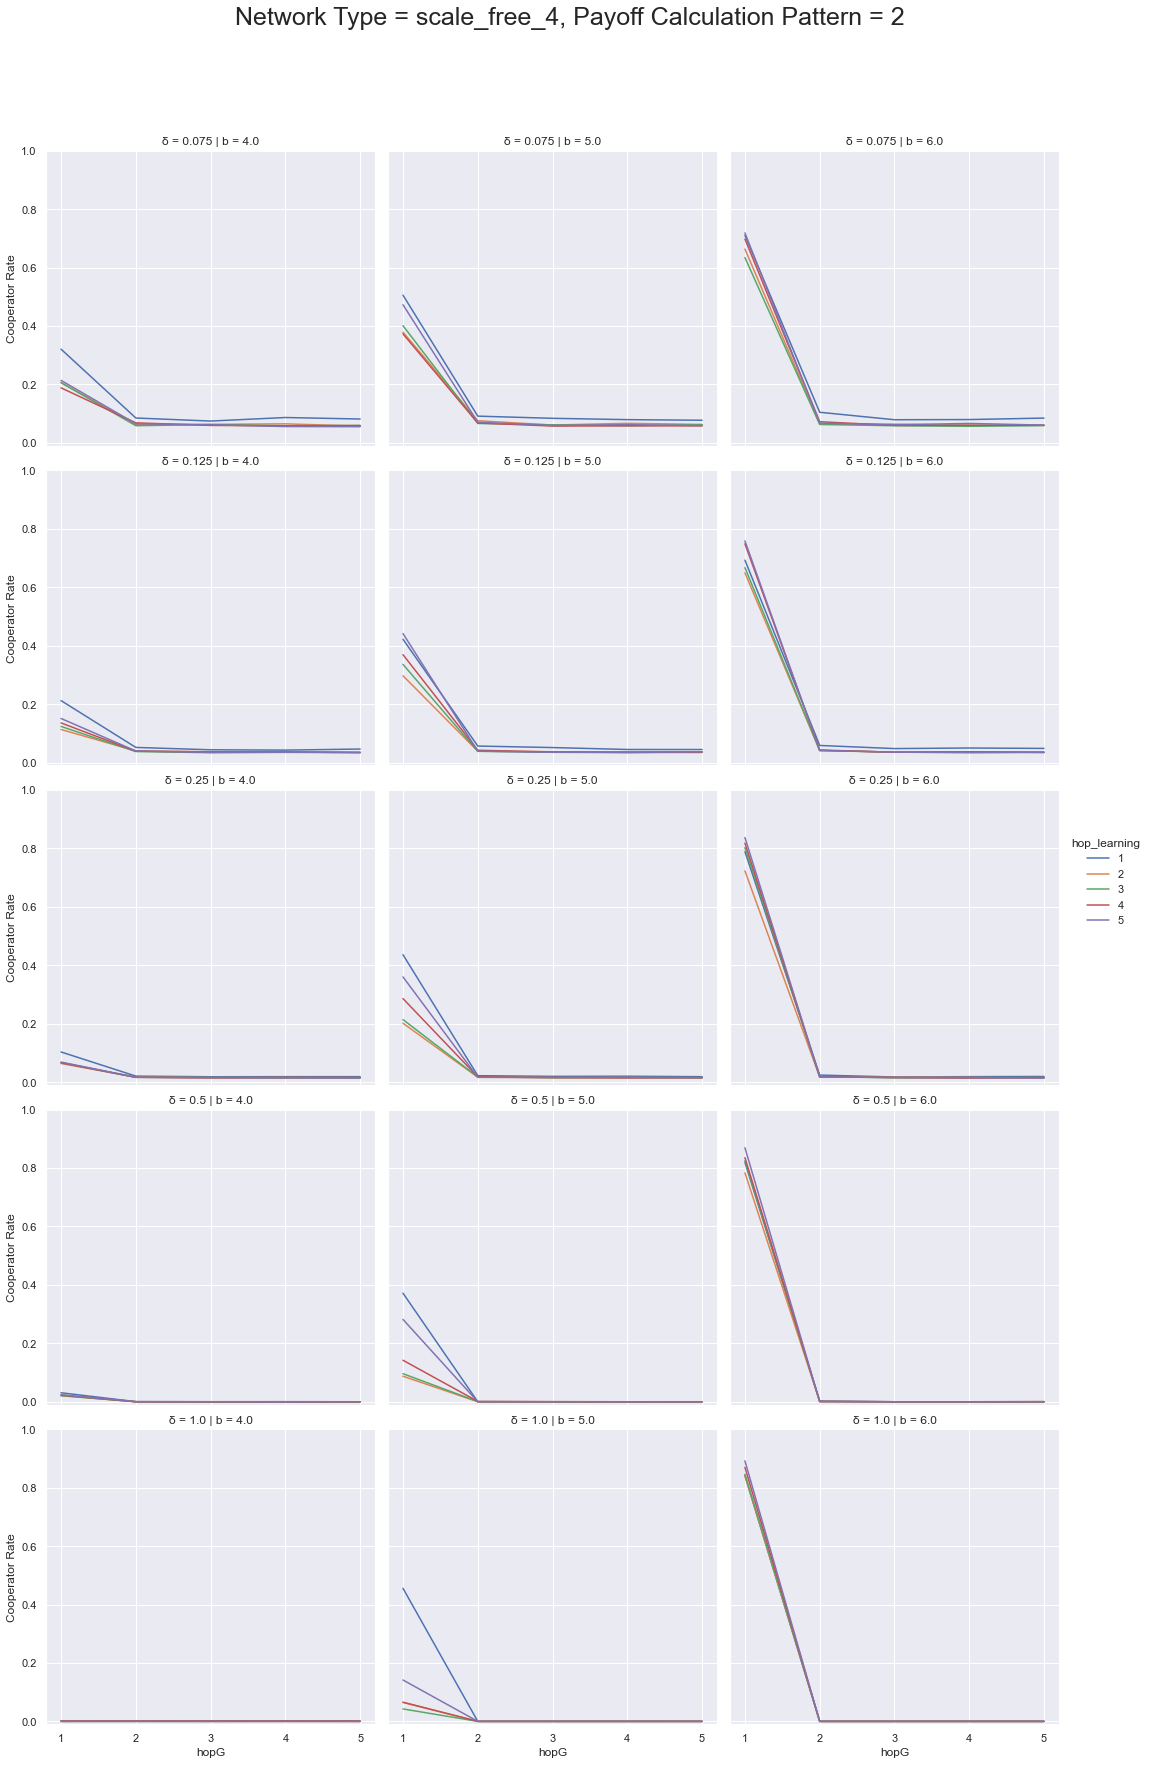

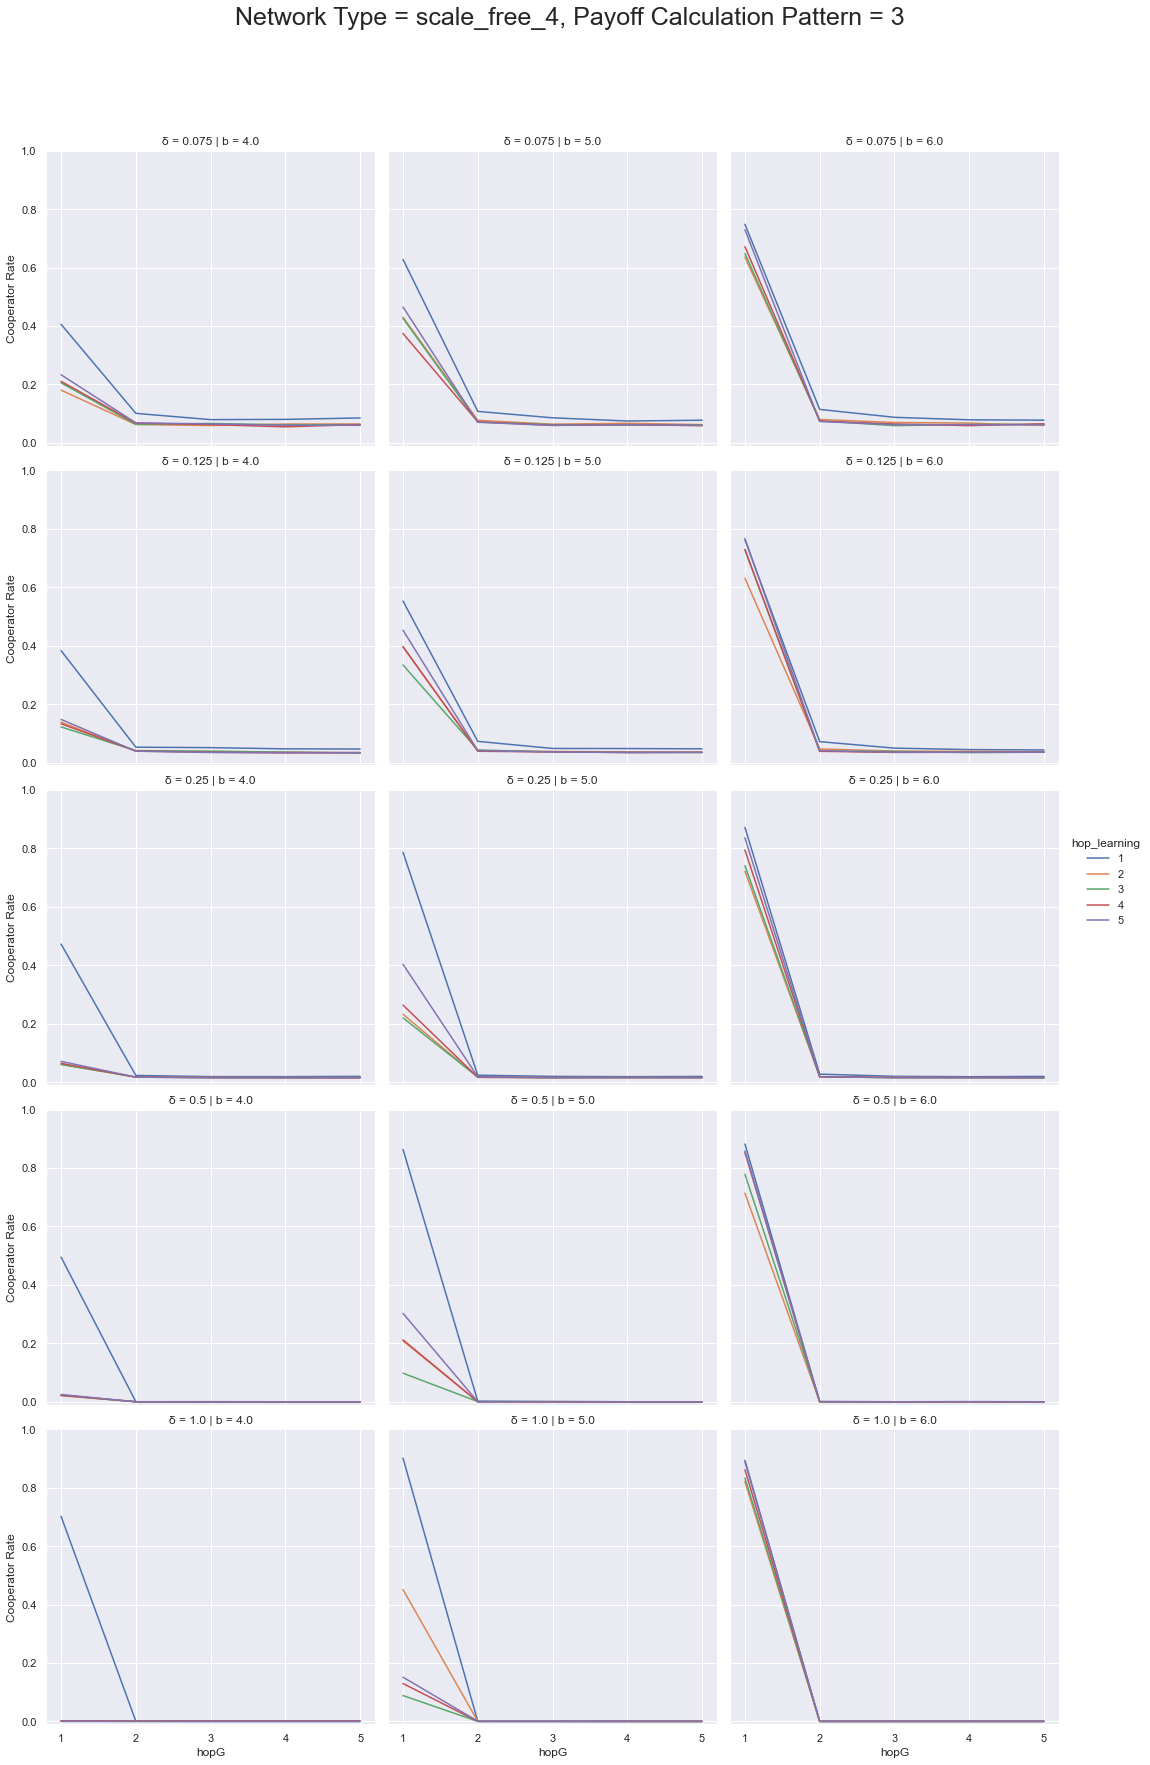

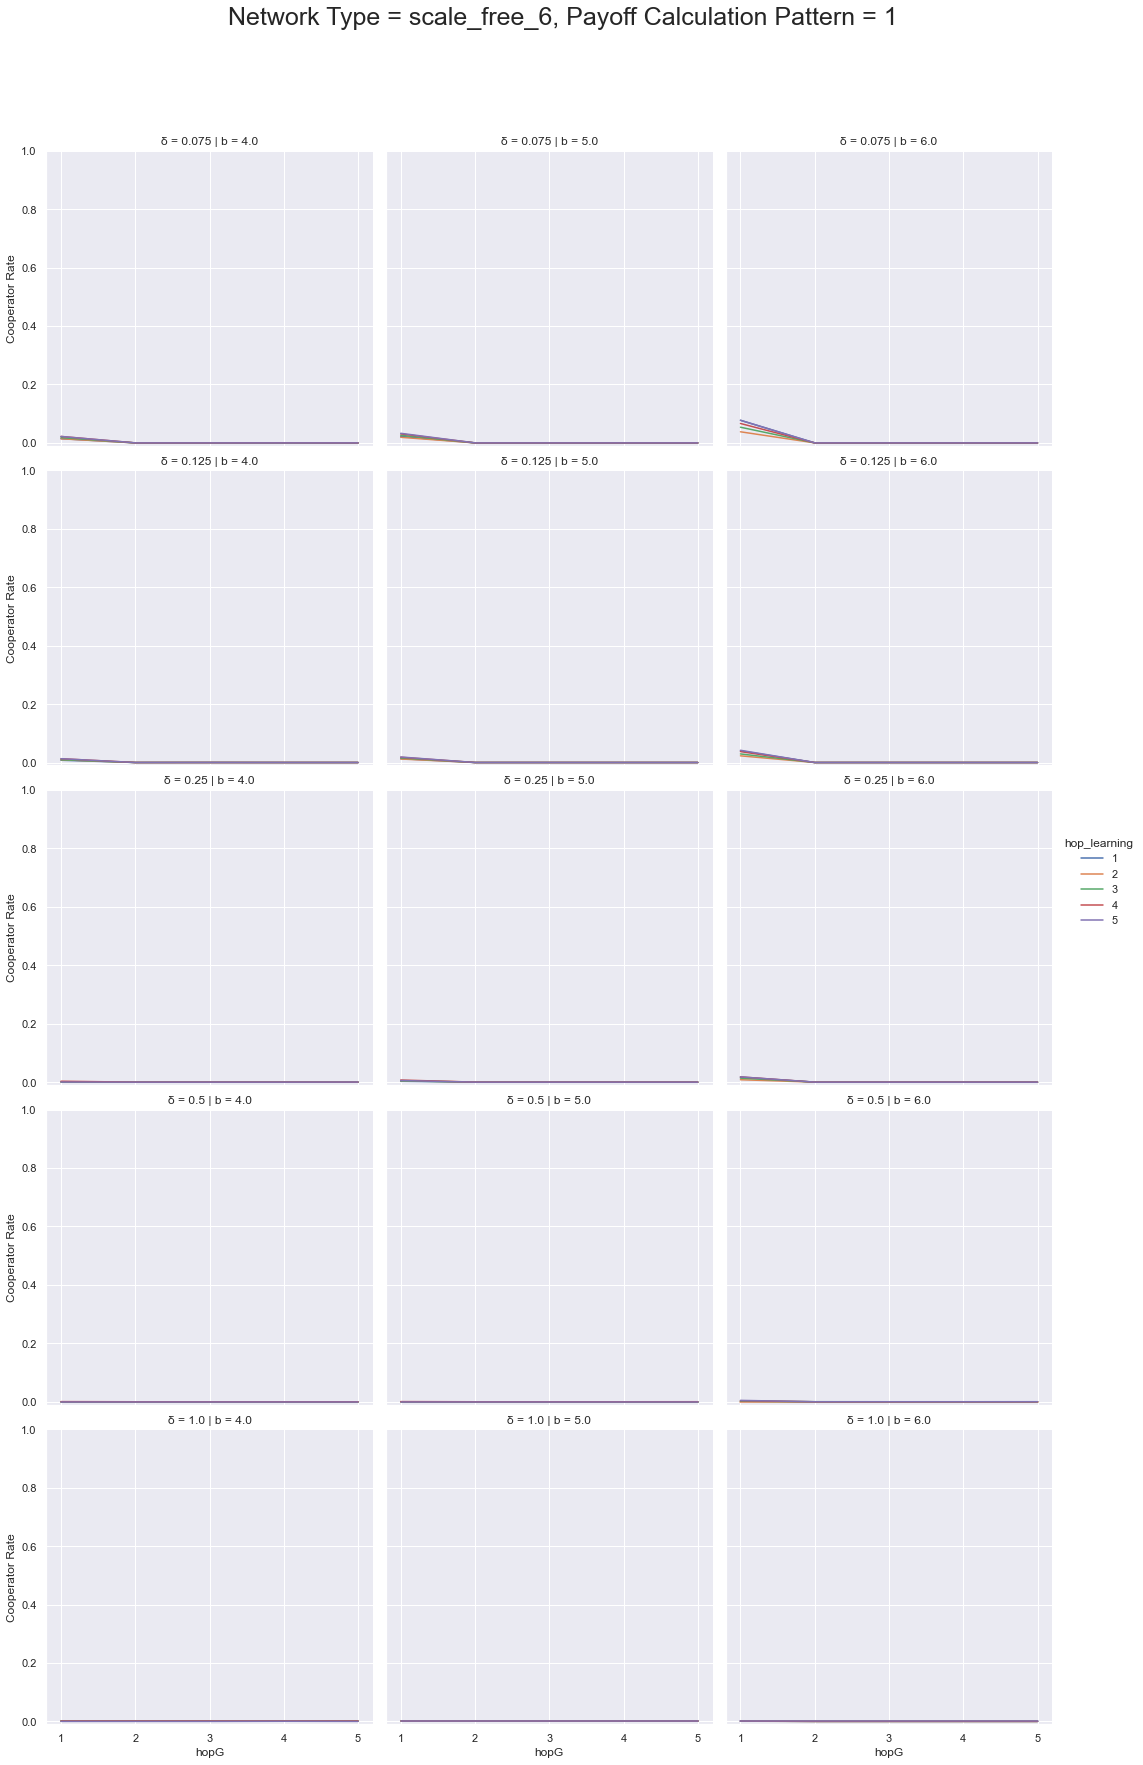

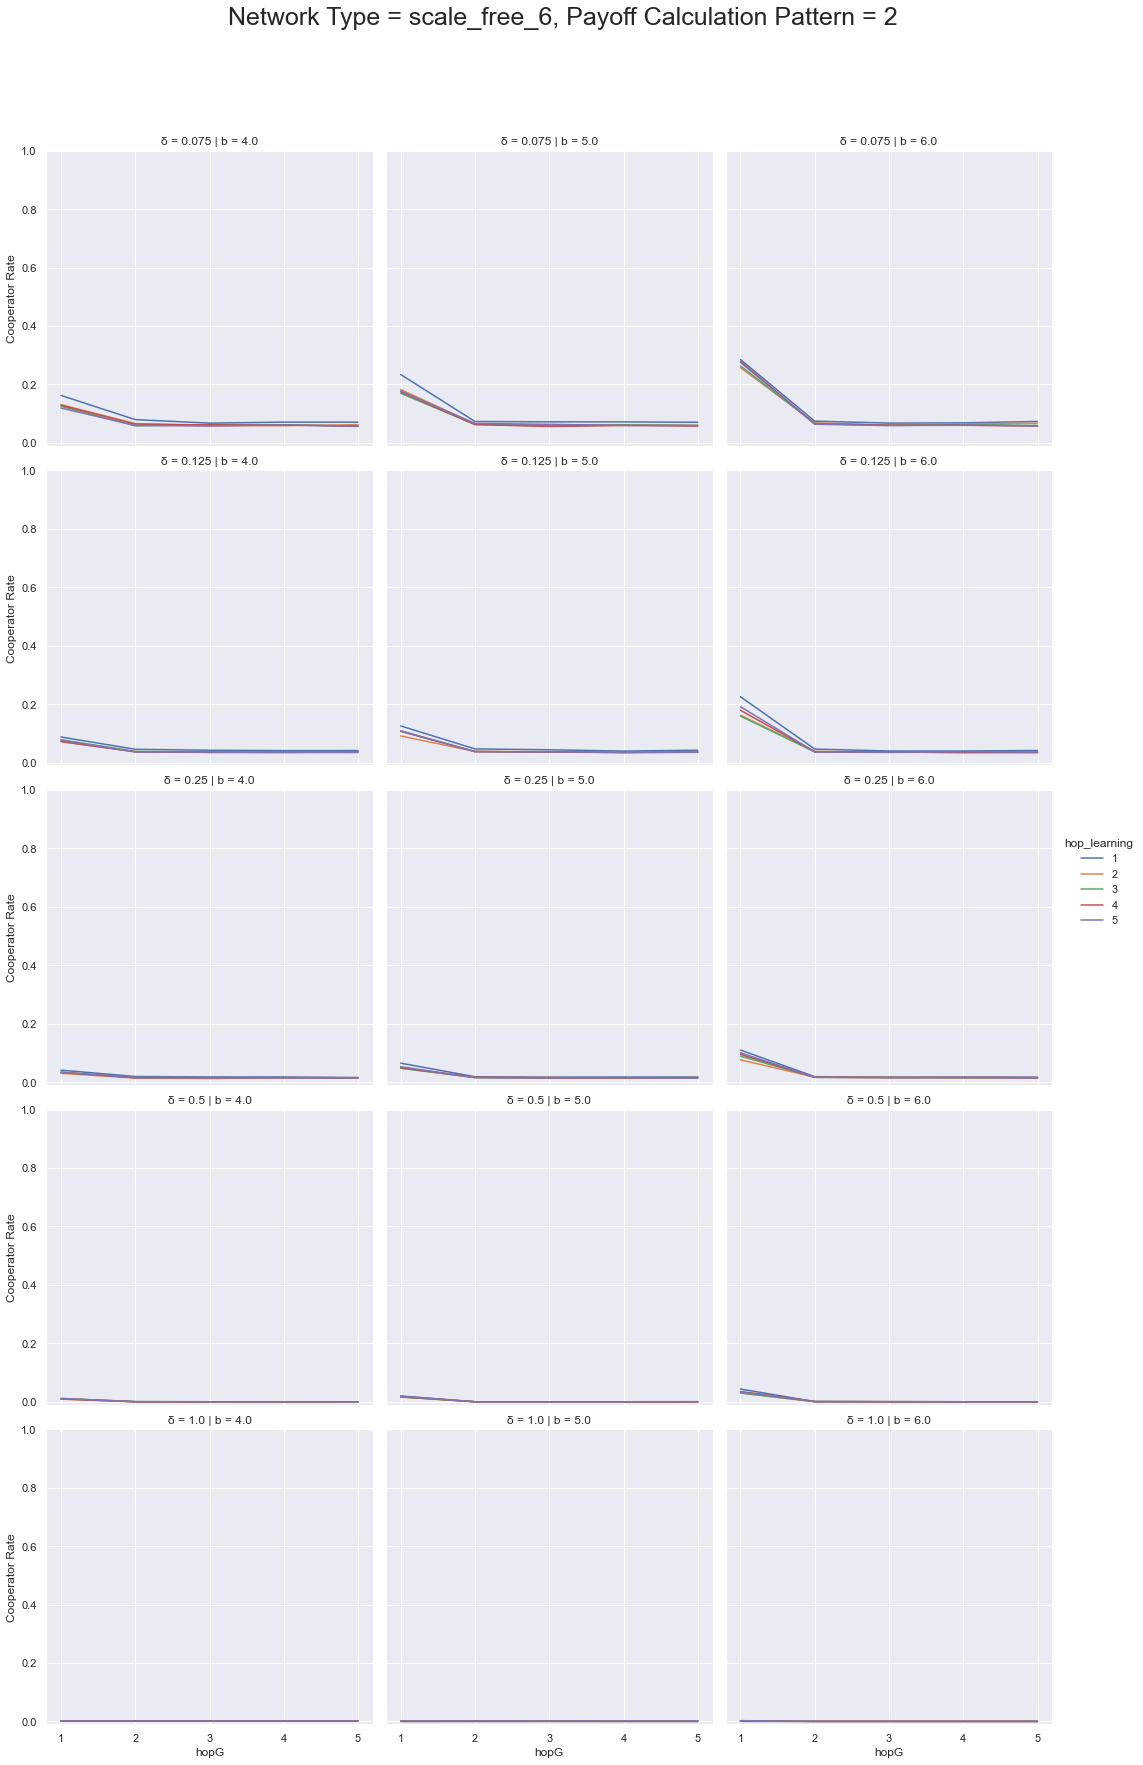

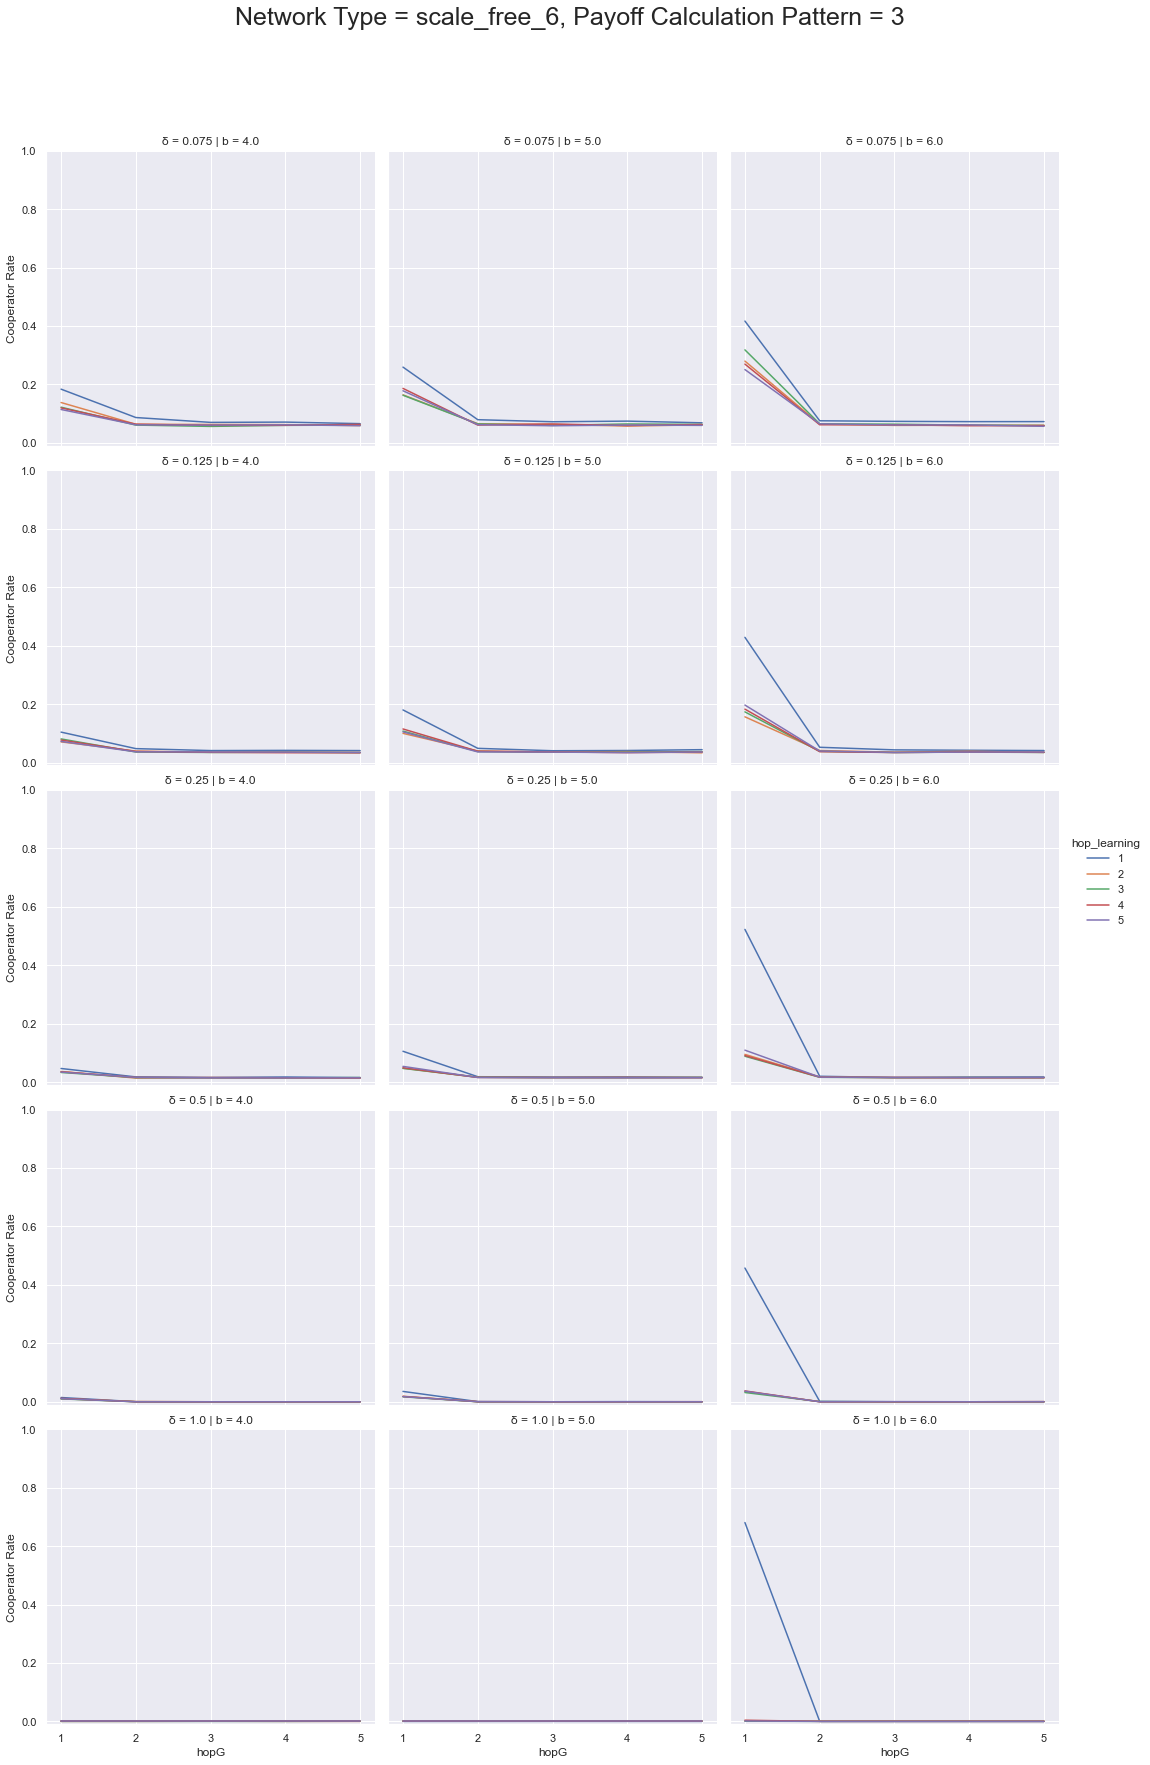

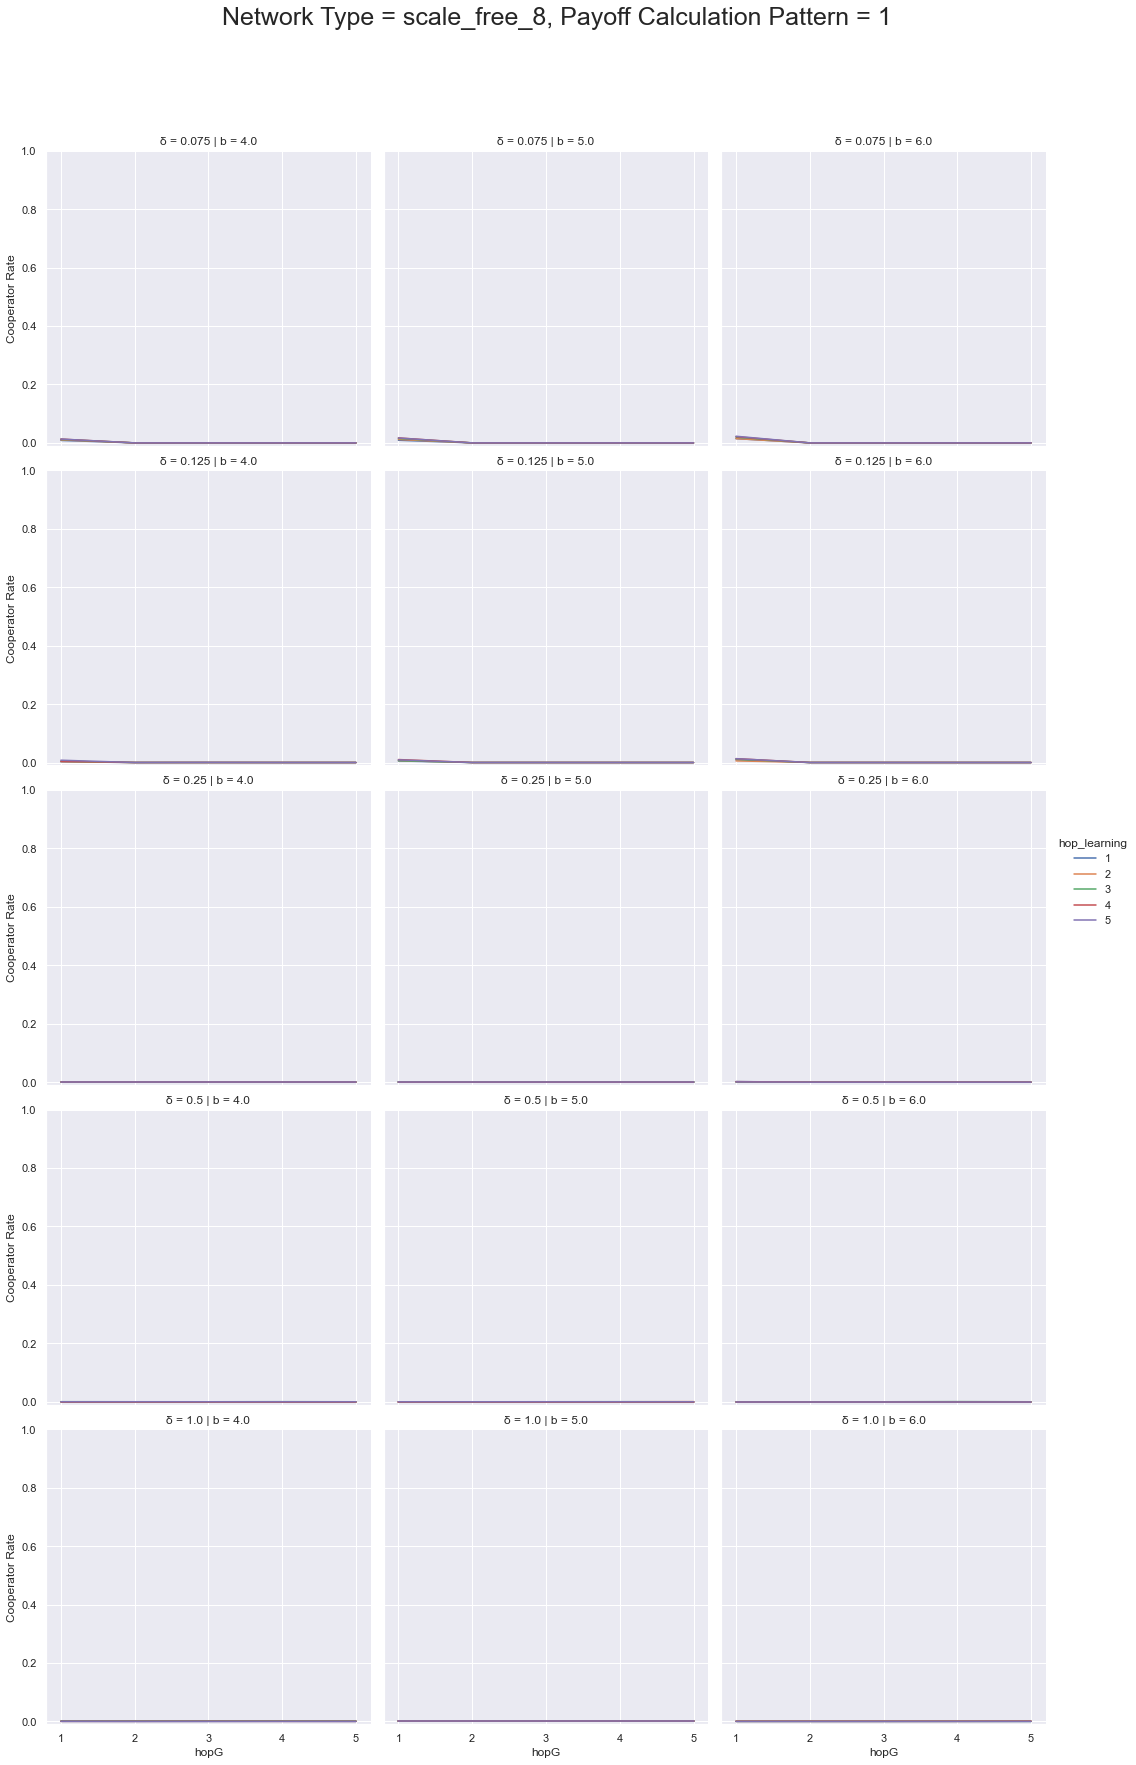

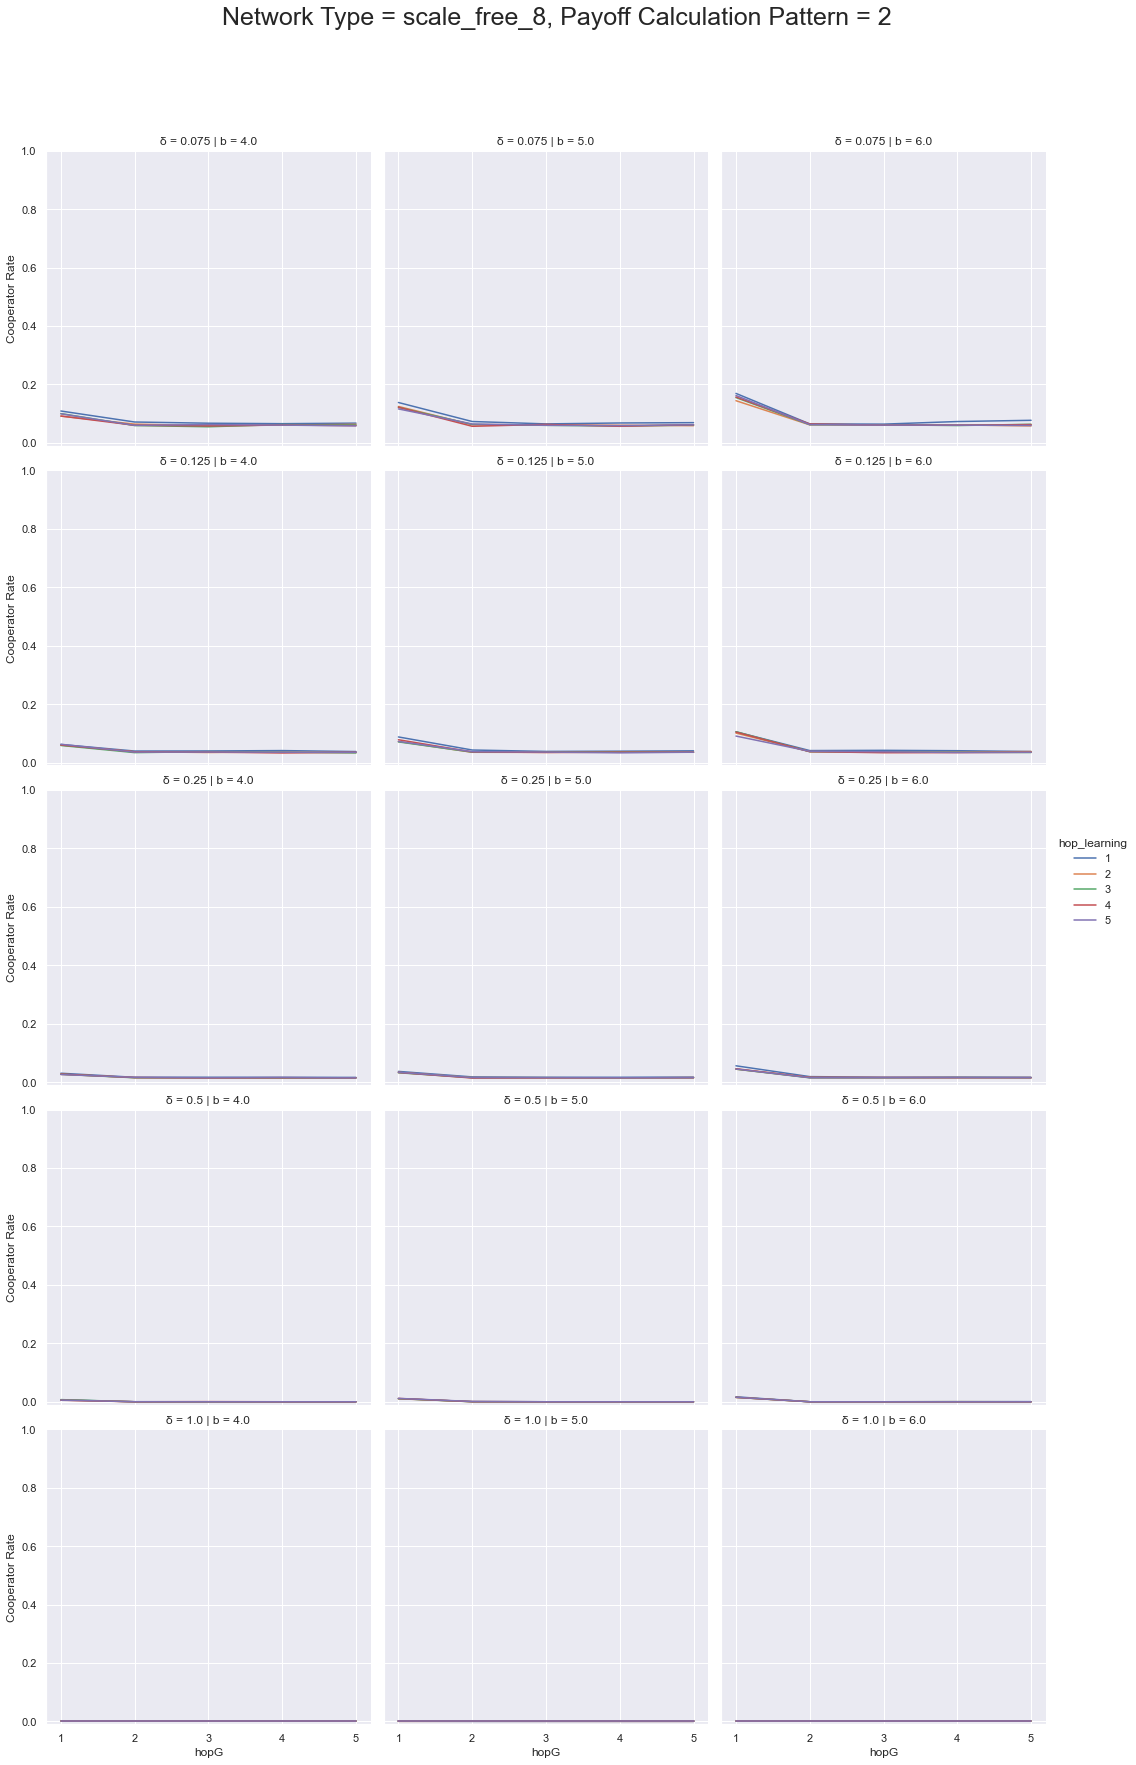

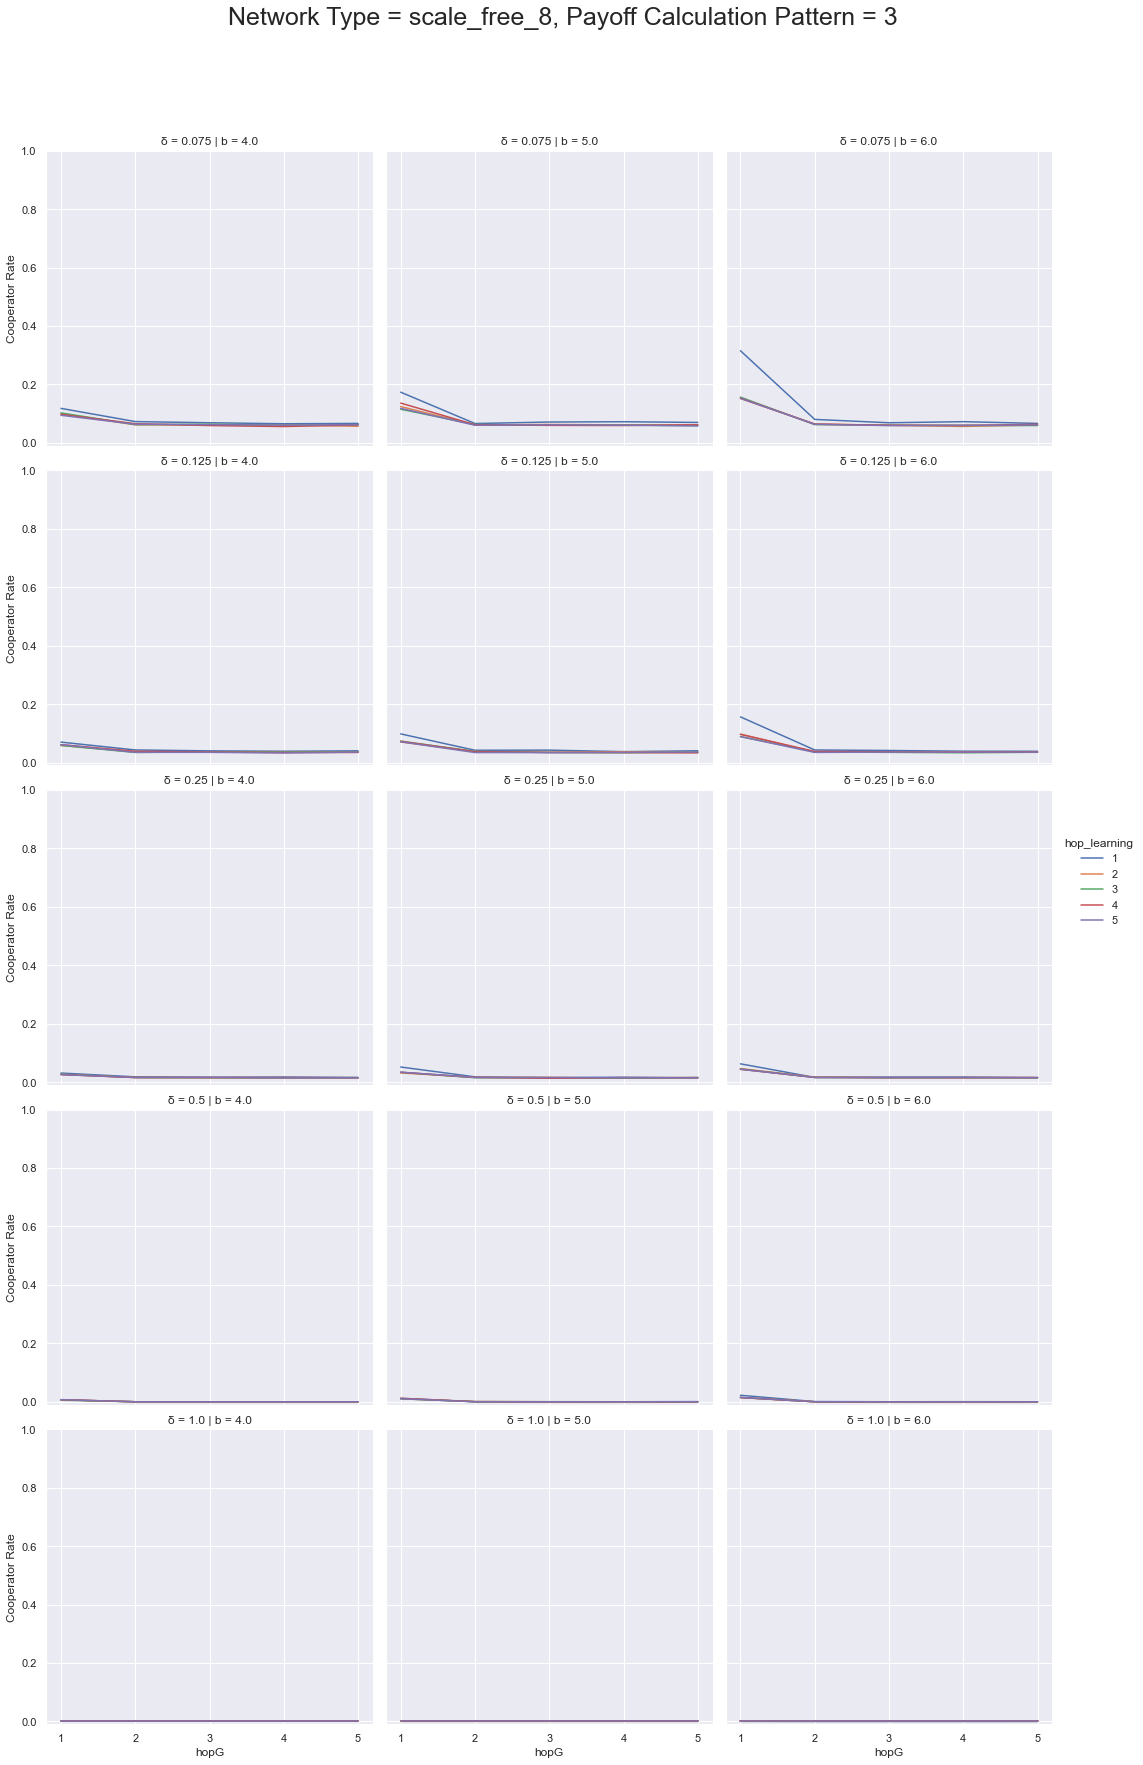

In [4]:
for (_, network_type, calc_pattern) in df[['network_type', 'calc_pattern']].drop_duplicates().itertuples():
    _df = df[(df.network_type == network_type) & (df.calc_pattern == calc_pattern)][[
        'hop_game', 'hop_learning', 'b', 'δ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_game', y='cooperator_rate', hue='hop_learning', row='δ', col='b', data=_df)
    g.set_axis_labels('hopG', 'Cooperator Rate')
    g.fig.suptitle('Network Type = {}, Payoff Calculation Pattern = {}'.format(network_type, calc_pattern), size=25)
    g.fig.subplots_adjust(top=.9)
    g.set(ylim=(-0.01, 1))